In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Ridge
import seaborn as sns
sns.set()
import joblib
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform,randint
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
import pickle
import sklearn.preprocessing as preproc 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr


import warnings
warnings.filterwarnings("ignore")

In [11]:
# Load data from CSV file
data = pd.read_csv('ANN_df.csv')

# Separate features and target variable
X = data.drop(['GDP_per_capita_(constant_2015_US$)', 'Country_Name_Africa Eastern and Southern', 'Country_Name_Africa Western and Central', 'Country_Name_Angola', 'Country_Name_Benin', 'Country_Name_Botswana', 'Country_Name_Burkina Faso', 'Country_Name_Burundi', 'Country_Name_Cameroon', 'Country_Name_Central African Republic', 'Country_Name_Chad', 'Country_Name_China', 'Country_Name_Congo, Dem. Rep.', 'Country_Name_Congo, Rep.', "Country_Name_Cote d'Ivoire", 'Country_Name_Equatorial Guinea', 'Country_Name_Eswatini', 'Country_Name_Ethiopia', 'Country_Name_Gabon', 'Country_Name_Gambia, The', 'Country_Name_Ghana', 'Country_Name_Guinea', 'Country_Name_Guinea-Bissau', 'Country_Name_Kenya', 'Country_Name_Lesotho', 'Country_Name_Madagascar', 'Country_Name_Malawi', 'Country_Name_Mali', 'Country_Name_Mauritania', 'Country_Name_Mauritius', 'Country_Name_Mozambique', 'Country_Name_Namibia', 'Country_Name_Niger', 'Country_Name_Nigeria', 'Country_Name_Rwanda', 'Country_Name_Seychelles', 'Country_Name_Sierra Leone', 'Country_Name_South Africa', 'Country_Name_Sub-Saharan Africa (excluding high income)', 'Country_Name_Sudan', 'Country_Name_Tanzania', 'Country_Name_Togo', 'Country_Name_Uganda', 'Country_Name_World', 'Country_Name_Zambia', 'Country_Name_Zimbabwe'], axis=1)

y = data['GDP_per_capita_(constant_2015_US$)']

# Calculate correlation coefficients between features and target variable
correlations = []
for feature in X.columns:
    correlation, _ = pearsonr(X[feature], y)
    correlations.append(abs(correlation))

# Select features with highest correlation coefficients
k_best = SelectKBest(k=10)
k_best.fit(X, y)
selected_features = X.columns[k_best.get_support()]

# Print selected features
print(selected_features)


Index(['Renewable_electricity_output_(%_of_total_electricity_output)',
       'Taxes_on_exports_(%_of_tax_revenue)', 'Taxes_on_exports_(current_LCU)',
       'Taxes_on_international_trade_(%_of_revenue)',
       'Taxes_on_international_trade_(current_LCU)', 'Trade_(%_of_GDP)',
       'Unemployment,_total_(%_of_total_labor_force)_(modeled_ILO_estimate)',
       'Unemployment,_youth_total_(%_of_total_labor_force_ages_15-24)_(modeled_ILO_estimate)',
       'Vulnerable_employment,_total_(%_of_total_employment)_(modeled_ILO_estimate)',
       'Wage_and_salaried_workers,_total_(%_of_total_employment)_(modeled_ILO_estimate)'],
      dtype='object')


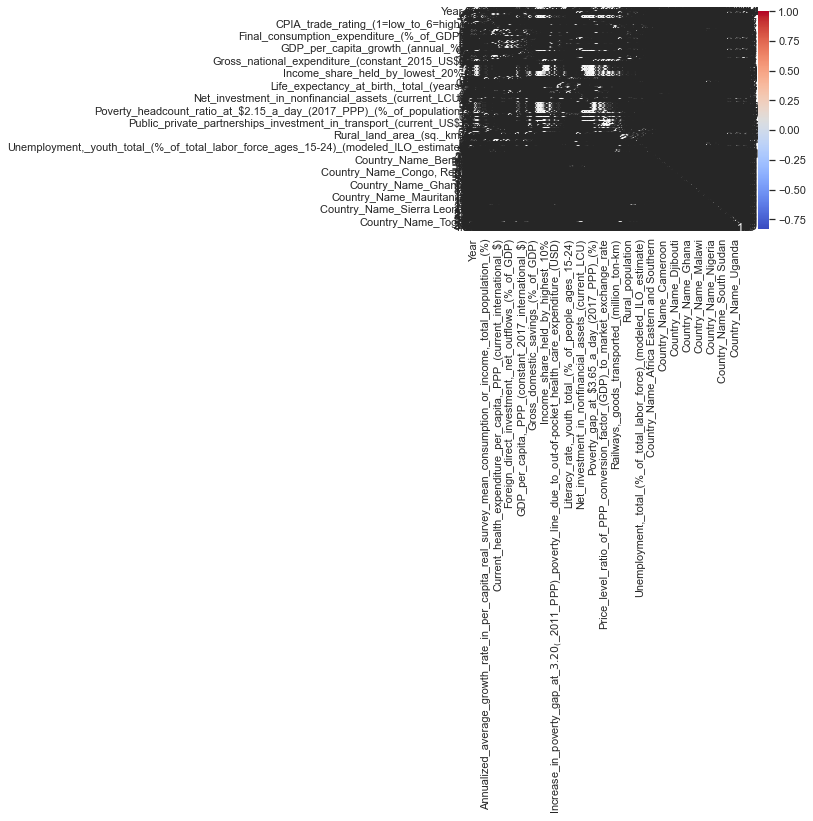

In [13]:
#Correlation Matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr = data.corr()

# Create heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)

# Show plot
plt.show()

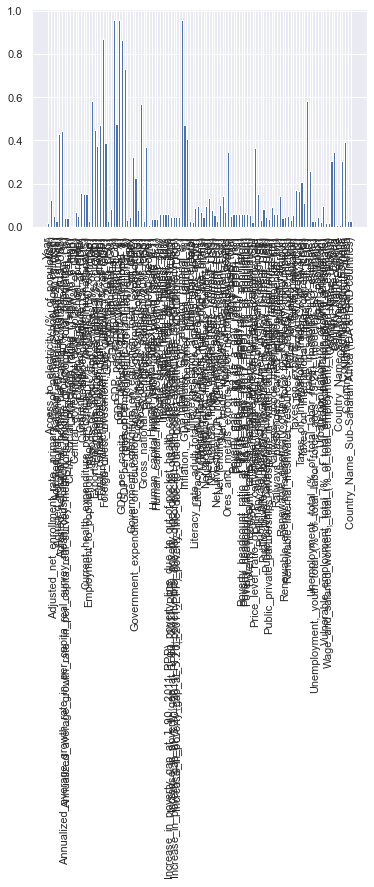

In [14]:
#Map Bar Chart to Visualise the top 10 correlated features to GDP 

import matplotlib.pyplot as plt

# Calculate correlation coefficients between features and target variable
correlations = []
for feature in X.columns:
    correlation, _ = pearsonr(X[feature], y)
    correlations.append(abs(correlation))

# Create bar chart
plt.bar(X.columns, correlations)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()


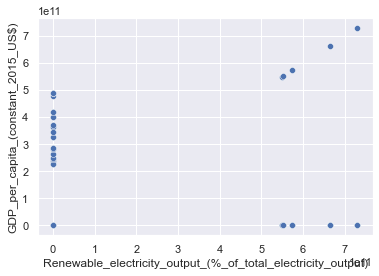

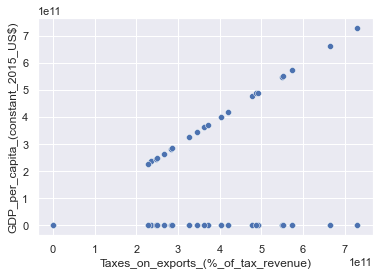

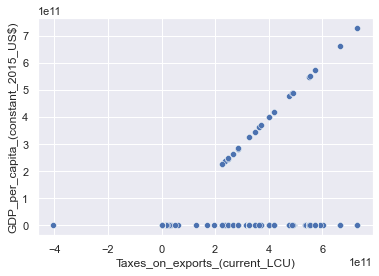

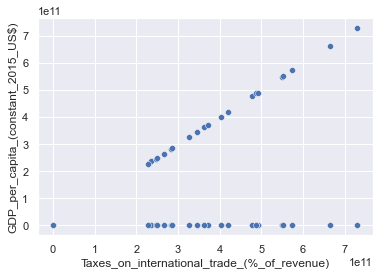

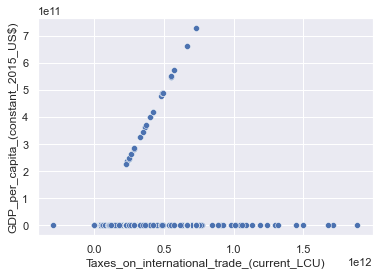

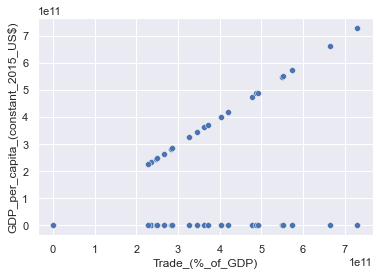

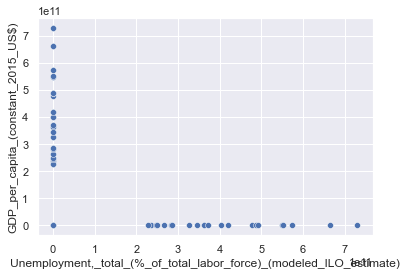

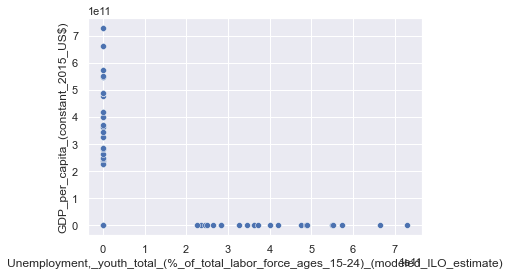

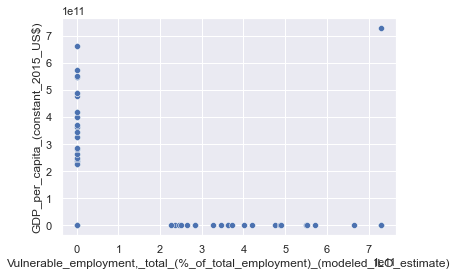

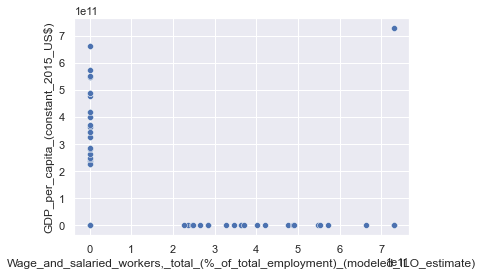

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatterplot for each selected feature
for feature in selected_features:
    sns.scatterplot(x=X[feature], y=y)
    plt.show()


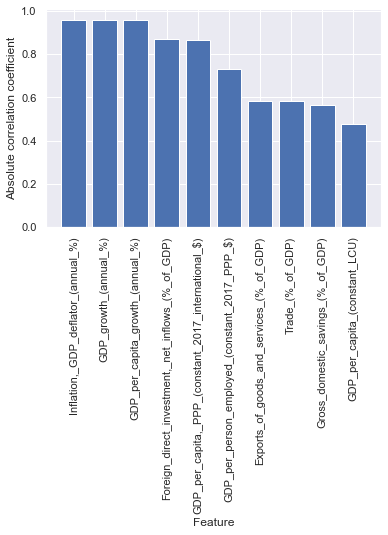

In [24]:
import matplotlib.pyplot as plt

# Create a dictionary of feature-correlation pairs
feature_corr = dict(zip(X.columns, correlations))

# Sort the dictionary by descending correlation coefficients
sorted_feature_corr = {k: v for k, v in sorted(feature_corr.items(), key=lambda item: item[1], reverse=True)}

# Plot the top 10 correlated features
top_features = list(sorted_feature_corr.keys())[:10]
plt.bar(top_features, [sorted_feature_corr[feat] for feat in top_features])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Absolute correlation coefficient')
plt.show()


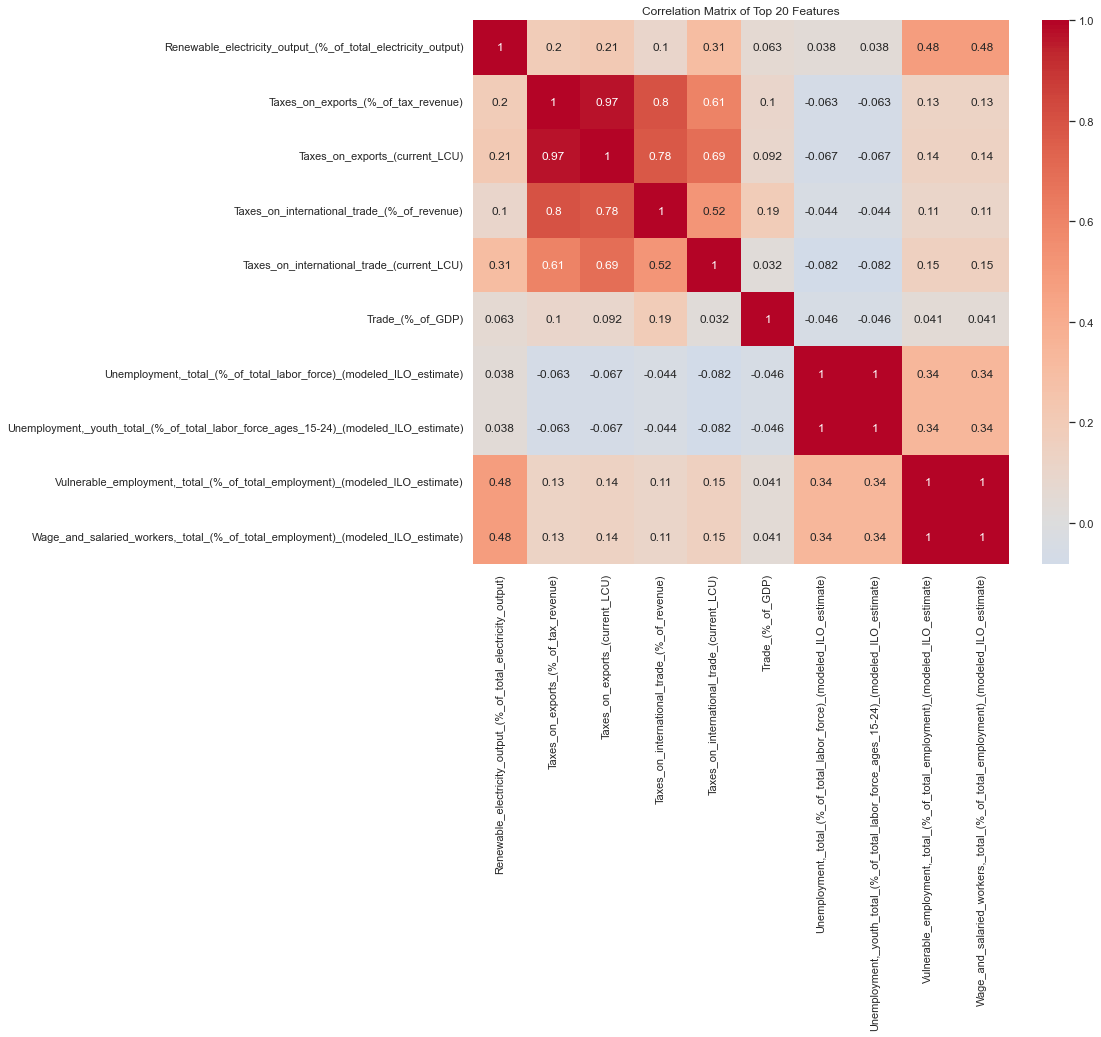

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('ANN_df.csv')

# Separate features and target variable
X = data.drop(['GDP_per_capita_(constant_2015_US$)', 'Country_Name_Africa Eastern and Southern', 'Country_Name_Africa Western and Central', 'Country_Name_Angola', 'Country_Name_Benin', 'Country_Name_Botswana', 'Country_Name_Burkina Faso', 'Country_Name_Burundi', 'Country_Name_Cameroon', 'Country_Name_Central African Republic', 'Country_Name_Chad', 'Country_Name_China', 'Country_Name_Congo, Dem. Rep.', 'Country_Name_Congo, Rep.', "Country_Name_Cote d'Ivoire", 'Country_Name_Equatorial Guinea', 'Country_Name_Eswatini', 'Country_Name_Ethiopia', 'Country_Name_Gabon', 'Country_Name_Gambia, The', 'Country_Name_Ghana', 'Country_Name_Guinea', 'Country_Name_Guinea-Bissau', 'Country_Name_Kenya', 'Country_Name_Lesotho', 'Country_Name_Madagascar', 'Country_Name_Malawi', 'Country_Name_Mali', 'Country_Name_Mauritania', 'Country_Name_Mauritius', 'Country_Name_Mozambique', 'Country_Name_Namibia', 'Country_Name_Niger', 'Country_Name_Nigeria', 'Country_Name_Rwanda', 'Country_Name_Seychelles', 'Country_Name_Sierra Leone', 'Country_Name_South Africa', 'Country_Name_Sub-Saharan Africa (excluding high income)', 'Country_Name_Sudan', 'Country_Name_Tanzania', 'Country_Name_Togo', 'Country_Name_Uganda', 'Country_Name_World', 'Country_Name_Zambia', 'Country_Name_Zimbabwe'], axis=1)

y = data['GDP_per_capita_(constant_2015_US$)']

# Calculate correlation coefficients between features and target variable
correlations = []
for feature in X.columns:
    correlation, _ = pearsonr(X[feature], y)
    correlations.append(abs(correlation))

# Select features with highest correlation coefficients
k_best = SelectKBest(k=10)
k_best.fit(X, y)
selected_features = X.columns[k_best.get_support()]

# Create a new dataframe with the selected features
selected_data = data[selected_features]

# Calculate the correlation matrix
corr_matrix = selected_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, center=0)
plt.title('Correlation Matrix of Top 20 Features')
plt.show()



In [20]:
# Load data from CSV file
data = pd.read_csv('ANN_df.csv')

# Separate features and target variable
X = data.drop(['GDP_per_capita_(constant_2015_US$)', 'Country_Name_Africa Eastern and Southern', 'Country_Name_Africa Western and Central', 'Country_Name_Angola', 'Country_Name_Benin', 'Country_Name_Botswana', 'Country_Name_Burkina Faso', 'Country_Name_Burundi', 'Country_Name_Cameroon', 'Country_Name_Central African Republic', 'Country_Name_Chad', 'Country_Name_China', 'Country_Name_Congo, Dem. Rep.', 'Country_Name_Congo, Rep.', "Country_Name_Cote d'Ivoire", 'Country_Name_Equatorial Guinea', 'Country_Name_Eswatini', 'Country_Name_Ethiopia', 'Country_Name_Gabon', 'Country_Name_Gambia, The', 'Country_Name_Ghana', 'Country_Name_Guinea', 'Country_Name_Guinea-Bissau', 'Country_Name_Kenya', 'Country_Name_Lesotho', 'Country_Name_Madagascar', 'Country_Name_Malawi', 'Country_Name_Mali', 'Country_Name_Mauritania', 'Country_Name_Mauritius', 'Country_Name_Mozambique', 'Country_Name_Namibia', 'Country_Name_Niger', 'Country_Name_Nigeria', 'Country_Name_Rwanda', 'Country_Name_Seychelles', 'Country_Name_Sierra Leone', 'Country_Name_South Africa', 'Country_Name_Sub-Saharan Africa (excluding high income)', 'Country_Name_Sudan', 'Country_Name_Tanzania', 'Country_Name_Togo', 'Country_Name_Uganda', 'Country_Name_World', 'Country_Name_Zambia', 'Country_Name_Zimbabwe'], axis=1)

y = data['GDP_per_capita_(constant_2015_US$)']

# Calculate correlation coefficients between features and target variable
correlations = []
for feature in X.columns:
    correlation, _ = pearsonr(X[feature], y)
    correlations.append(abs(correlation))

# Select features with highest correlation coefficients
k_best = SelectKBest(k=20)
k_best.fit(X, y)
selected_features = X.columns[k_best.get_support()]

# Print selected features
print(selected_features)

Index(['Inflation,_GDP_deflator:_linked_series_(annual_%)',
       'Literacy_rate,_adult_total_(%_of_people_ages_15_and_above)',
       'Literacy_rate,_youth_total_(%_of_people_ages_15-24)',
       'Net_acquisition_of_financial_assets_(current_LCU)',
       'Net_investment_in_nonfinancial_assets_(current_LCU)',
       'Net_lending_(+)_/_net_borrowing_(-)_(current_LCU)',
       'Present_value_of_external_debt_(current_US$)',
       'Public_private_partnerships_investment_in_ICT_(current_US$)',
       'Public_private_partnerships_investment_in_energy_(current_US$)',
       'Public_private_partnerships_investment_in_water_and_sanitation_(current_US$)',
       'Renewable_electricity_output_(%_of_total_electricity_output)',
       'Taxes_on_exports_(%_of_tax_revenue)', 'Taxes_on_exports_(current_LCU)',
       'Taxes_on_international_trade_(%_of_revenue)',
       'Taxes_on_international_trade_(current_LCU)', 'Trade_(%_of_GDP)',
       'Unemployment,_total_(%_of_total_labor_force)_(modeled_IL

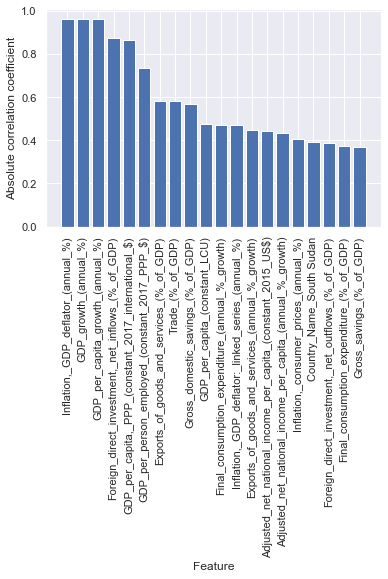

In [21]:
import matplotlib.pyplot as plt

# Create a dictionary of feature-correlation pairs
feature_corr = dict(zip(X.columns, correlations))

# Sort the dictionary by descending correlation coefficients
sorted_feature_corr = {k: v for k, v in sorted(feature_corr.items(), key=lambda item: item[1], reverse=True)}

# Plot the top 10 correlated features
top_features = list(sorted_feature_corr.keys())[:20]
plt.bar(top_features, [sorted_feature_corr[feat] for feat in top_features])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Absolute correlation coefficient')
plt.show()

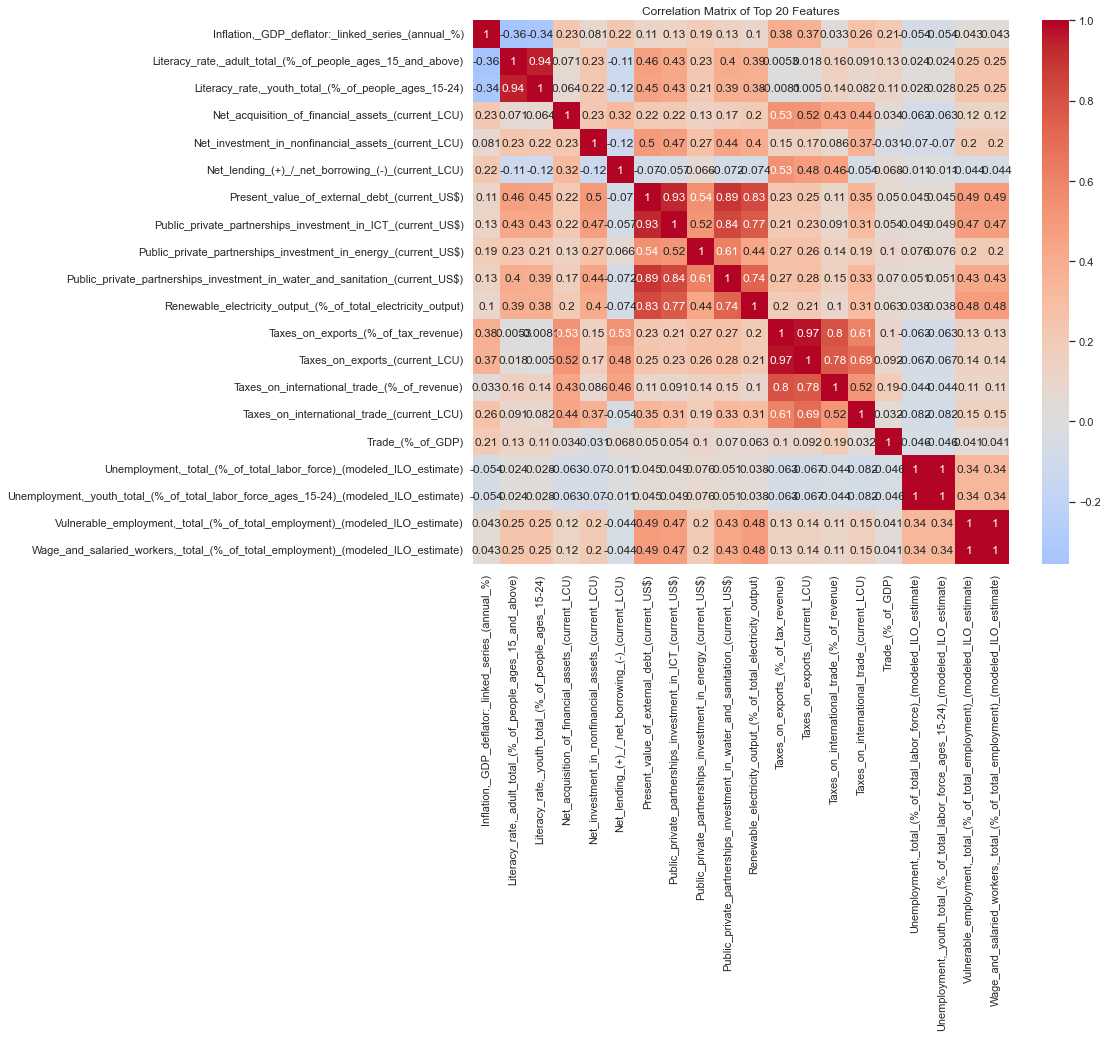

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('ANN_df.csv')

# Separate features and target variable
X = data.drop(['GDP_per_capita_(constant_2015_US$)', 'Country_Name_Africa Eastern and Southern', 'Country_Name_Africa Western and Central', 'Country_Name_Angola', 'Country_Name_Benin', 'Country_Name_Botswana', 'Country_Name_Burkina Faso', 'Country_Name_Burundi', 'Country_Name_Cameroon', 'Country_Name_Central African Republic', 'Country_Name_Chad', 'Country_Name_China', 'Country_Name_Congo, Dem. Rep.', 'Country_Name_Congo, Rep.', "Country_Name_Cote d'Ivoire", 'Country_Name_Equatorial Guinea', 'Country_Name_Eswatini', 'Country_Name_Ethiopia', 'Country_Name_Gabon', 'Country_Name_Gambia, The', 'Country_Name_Ghana', 'Country_Name_Guinea', 'Country_Name_Guinea-Bissau', 'Country_Name_Kenya', 'Country_Name_Lesotho', 'Country_Name_Madagascar', 'Country_Name_Malawi', 'Country_Name_Mali', 'Country_Name_Mauritania', 'Country_Name_Mauritius', 'Country_Name_Mozambique', 'Country_Name_Namibia', 'Country_Name_Niger', 'Country_Name_Nigeria', 'Country_Name_Rwanda', 'Country_Name_Seychelles', 'Country_Name_Sierra Leone', 'Country_Name_South Africa', 'Country_Name_Sub-Saharan Africa (excluding high income)', 'Country_Name_Sudan', 'Country_Name_Tanzania', 'Country_Name_Togo', 'Country_Name_Uganda', 'Country_Name_World', 'Country_Name_Zambia', 'Country_Name_Zimbabwe'], axis=1)

y = data['GDP_per_capita_(constant_2015_US$)']

# Calculate correlation coefficients between features and target variable
correlations = []
for feature in X.columns:
    correlation, _ = pearsonr(X[feature], y)
    correlations.append(abs(correlation))

# Select features with highest correlation coefficients
k_best = SelectKBest(k=20)
k_best.fit(X, y)
selected_features = X.columns[k_best.get_support()]

# Create a new dataframe with the selected features
selected_data = data[selected_features]

# Calculate the correlation matrix
corr_matrix = selected_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, center=0)
plt.title('Correlation Matrix of Top 20 Features')
plt.show()